<a href="https://colab.research.google.com/github/aleksejalex/expert-octo-eureka/blob/main/RADcv_Assignment_2_Gaj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Příprava: balíčky, vl. fce a dataset


In [39]:
# importy balicku
import inspect
import numpy as np
import pandas as pd
import seaborn as sbn
import csv
import matplotlib as mpt
import statsmodels.formula.api as sm
from matplotlib import pyplot as plt



def retrieve_name(var):
    "vrati nazev promenne jako string"
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]

examplevarr = 4
print(examplevarr)
print(retrieve_name(examplevarr))

def gauss(x, mi, sigma2):
    "hustota normalniho rozdeleni. x je bud cislo nebo np.array"
    return (1/(np.sqrt(2*np.pi*sigma2)) * np.exp (-  ( (x-mi)**2 ) / (2*sigma2) ) )


4
['examplevarr']


In [40]:
# additional settings for plotting images:
plt.rcParams.update({"figure.dpi": 130})   # increase DPI, default = 96
#%config InlineBackend.figure_format = "svg"  # every plot (matplotlib's or seaborn's) must be a SVG image

In [41]:
# import datasetu (pomoci Pandas)
# (puvodne dataset byl stazen z >>  https://r-data.pmagunia.com/dataset/r-dataset-package-mass-boston  )
url = "https://raw.githubusercontent.com/aleksejalex/expert-octo-eureka/main/dataset_boston_from_R.csv"
imported_data = pd.read_csv(url)

imported_data
#data.info

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# 2. zápočtová úloha z 01RAD

## Popis úlohy

Datový soubor `Boston` je obsažen v balíku `MASS` a lze použít rovnou po načtení příslušné knihovny.

Obsahuje celkem 506 záznamů z obcí v předměstí města Boston, MA, USA a data pocházejí ze studie v roce 1978.Viz Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Základní charakteristiky ohledně jednotlivých proměnných získáte pomocí funkcí `str(Boston)} a `summary(Boston)}.

Data celkem obsahují 14 proměnných, přičemž naším cílem je prozkoumat vliv 13 z nich na cenu nemovitostí `medv`. Přičemž anglický popis jednotlivých proměnných (sloupců) je následující:

Feature & Description 

`crim` per capita crime rate by town  \\

`zn`: proportion of residential land zoned for lots over 25,000 sq.ft  \\

`indus`: proportion of non-retail business acres per town  (%%%%%%%%%%)\\

`chas`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  

`nox`: nitrogen oxides concentration (parts per 10 million)  \\

`rm`: average number of rooms per dwelling  \\

`age`: proportion of owner-occupied units built prior to 1940  \\

`dis`: weighted mean of distances to five Boston employment centres  \\

`rad`: index of accessibility to radial highways  \\

`tax`: full-value property-tax rate per \$10,000  \\

`ptratio`: pupil-teacher ratio by town  \\

`black`:  $1000(B_k - 0.63)^2$ where $B_k$ is the proportion of blacks by town  \\

`lstat`: lower status of the population (percent)  \\

`medv`: median value of owner-occupied homes in \$1000s  \\


**cíl: prozkoumat vliv 13 proměnných na cenu nemovitostí `medv`**

In [42]:
# zakladni charakteristiky
imported_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [43]:
imported_data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000



## Podmínky a body

Úkol i protokol vypracujte samostatně. Pokud na řešení nějaké úlohy budete přesto s někým spolupracovat, radit se, nezapomeňte to u odpovědi na danou otázku uvést. Tato zápočtová úloha obsahuje 10 otázek po 1 bodu. Celkem za 3 zápočtové úlohy bude možné získat 30 bodů, přičemž pro získání zápočtu je potřeba více jak 20. Další dodatečné body mohu případně individuálně udělit za extra práci na mini domácích úkolech nebo za aktivitu v hodině.

## Odevzdání

Protokol ve formátu pdf (včetně příslušného Rmd souboru), nebo jak jupyter NB (ideálně s odkazem na Colab) odevzdejte prostřednictvím MS Teams, nejpozději do půlnoci  14. 12. 2022 (tj. za 3 týdny).

## Příprava dat:

* Otázka 01

  Z dat vyfilitrujte jen pozorování, kde proměnná `chas` je rovna 0, proměnná rad je menší než 20 a odezva `medv` neobsahuje opakující se maximální hodnoty vzniklé nejspíše zaokrouhlením. Zkontrolujte, že výsledný datset neobsahuje chybějící hodnoty a vykreslete scatterplot pro proměnné `indus` a `medv`.

In [44]:
data = imported_data

In [45]:
# kontrola na nan-y
nan_in_data = data.isnull().sum().sum()
print('Number of NaN values in dataframe: ' + str(nan_in_data))

Number of NaN values in dataframe: 0


In [46]:
# oriznuti datasetu podle zadani
data = data[data['chas']==0]
data = data[data['rad']<20]
medv_max = max(data['medv'])
data = data[data['medv'] != medv_max]

data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


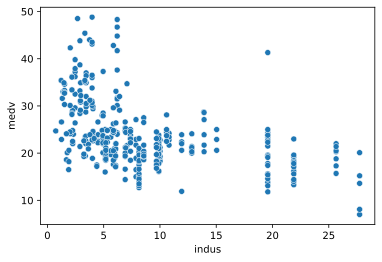

In [47]:
#sbn.set(style='whitegrid')

sbn.scatterplot(x="indus",
                    y="medv",
                    #hue="region",
                    data=data)

In [48]:
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## Regresní model závislosti mediánu ceny nemovitosti na zastoupení ne-maloobchodního podnikání v daném místě: 


* Otázka 2

  Sestavte jednoduchý regresní model a na jeho základech zjistěte zdali proměnná `indus`  ovlivňuje median ceny nemovitostí určených k bydlení `medv`. Pokud ano, o kolik je průměr mediánů cen nemovitostí nižší/vyšší při vzrůstu zastoupení nemaloobchodního podnikání o 5 jednotek? 

In [49]:
simple_model = sm.ols(formula = "medv ~ indus", data = data)
results = simple_model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     94.01
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           9.09e-20
Time:                        22:33:47   Log-Likelihood:                -1111.8
No. Observations:                 339   AIC:                             2228.
Df Residuals:                     337   BIC:                             2235.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.4338      0.587     48.466      0.0

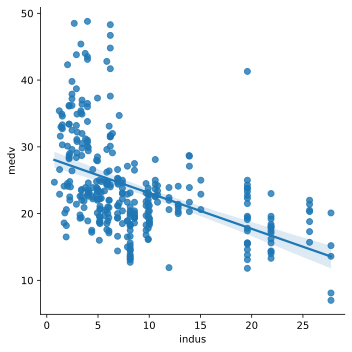

In [58]:
# pouze vizualizace situace pro predstavu
sbn.lmplot(data=data, x="indus", y="medv")

In [51]:
results.params.indus * 5

-2.679918274465498

Ano, proměnná `indus` ovlivňuje proměnnou `medv` (medián ceny nemovitostí).

Pokud nemaloobchodní podnikání vzroste o 5 jednotek, průměr mediánů cen nemovitostí (podle modelu výše) klesne o $ 5 \cdot \beta \cong 5 \cdot -0.53598 \cong -2.68$ 

(kde $\beta$ je sklon regresní přímky, viz kód výše).



In [52]:
# totez ukazano jinak:
# y = beta * x + intercept
results_y = lambda x: results.params.indus * x + results.params.Intercept
results_y(15)-results_y(10)

-2.6799182744655



* Otázka 3

  Vyzkoušejte model s mocninou a logaritmickou transformací odezvy. Pro výběr mocniné transformace vykreslete optimální  log-věrohodnostní profil u Box-Coxovy transformace a porovnejte navrženou transformaci s provedenou logaritmickou.

In [53]:
# model s logaritmickou transformaci odezvy (log(medv))
logy_model = sm.ols(formula = "np.log(medv) ~ indus", data = data)
logy_results = logy_model.fit()

print(logy_results.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(medv)   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     118.9
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           6.60e-24
Time:                        22:33:47   Log-Likelihood:                -12.683
No. Observations:                 339   AIC:                             29.37
Df Residuals:                     337   BIC:                             37.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3300      0.023    145.246      0.0

In [54]:
#### just test for AG
# model s logaritmickou transformaci vysvetlujici promenne (log(indus))
logx_model = sm.ols(formula = "medv ~ np.log(indus)", data = data)
logx_results = logx_model.fit()

print(logx_results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     121.1
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           2.91e-24
Time:                        22:33:47   Log-Likelihood:                -1101.5
No. Observations:                 339   AIC:                             2207.
Df Residuals:                     337   BIC:                             2215.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        33.4765      0.937     35.732

* Otázka 4

  Z log transformovaného modelu vyčtěte procentuální navýšení/pokles ceny nemovitostí při změně zastoupení nemaloobchodního podnikání o 5 jednotek  (odpověď typu: 
Střední cena nemovitosti v lokalitách okolo Bostonu,  liších se podílem nemaloobchodních zón, klesá/roste zhruba o XX% na každou 1 jednotku nárůstu/poklesu podílu nemaloobchodních zón.

In [54]:
# pracujeme tedy s 'logy_model' modelem





* Otázka 5

  Vyberte jeden z předešlých modelů (s/bez transformované odezvy) a zkuste transformovat i nezávislou proměnnou `indus`. Vyzkoušejte například po částech konstantní transformaci (odpovídající faktorizaci nezávislé proměnné), splines a polynomiální transformace (kvadratickou a kubickou). Zkuste využít informací získaných například z `crPlots(model)`. Lze některé z těchto modelů testovat mezi sebou F-testem? Pokud ano, proveďte a diskutujte.  



* Otázka 6

  Vyberte jeden z předešlých modelů, zdůvodněte jeho výběr a validujte ho pomocí příslušných testů hypotéz na rezidua (normalita, homoscedasticita, ...) a pomocí příslušných obrázků (QQplot, residua vs. fitted, atd.)

## Vícerozměrný regresní model

* Otázka 7

  Zkonstruujte lineární model s logaritmicky transformovanou odezvou `medv` a zkuste najít vztah mezi cenou a dalšími nezávislými proměnnými, které máte k dispozici (stačí aditivní model bez interakcí). Na základě kritérií jako jsou `AIC, BIC, $R^2$, F,` atd. vyberte podle vás nejvhodnější model. Lze vztah mezi `indus` a `medv`, pokud existuje, vysvětlit pomocí jiných proměnných? Tj, že například v oblastech s větším zastoupením velkoobchodu a průmyslu bydlí chudší lidé, je tam větší znečištění, nebo větší kriminalita atd.?

In [55]:
# bez interakci. 

In [56]:
logy_model = sm.ols(formula = "np.log(medv) ~ indus", data = data)
logy_results = logy_model.fit()

print(logy_results.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(medv)   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     118.9
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           6.60e-24
Time:                        22:33:47   Log-Likelihood:                -12.683
No. Observations:                 339   AIC:                             29.37
Df Residuals:                     337   BIC:                             37.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3300      0.023    145.246      0.0

* Otázka 8

  Použijte ve výsledném modelu proměnnou `indus` a porovnejte jak se změnil její vliv na medián ceny nemovitostí oproti jednoduchému regresnímu modelu s log transformovanou odezvou (viz otázka 4). Jaké je snížení průměrné ceny nemovitostí při vzrůstu proměnné indus o jednu jednotku? Pokud  proměnnou `indus` v modelu nemáte tak ji pro tuto otázku do modelu přiřaďte na úkor jiné proměnné s kterou je nejvíce korelovaná.

* Otázka 9

	Prezentujte váš výsledný model pro predikci `medv`, diskutujte výsledné parametry $R^2$, $\sigma$, $F$ a porovnejte je s jednoduchým lin. modelem z otázky 6. Jak se změnily a dala se tato změna očekávat? Validujte model (jak graficky, tak pomocí příslušných testů hypotéz). Pomocí Partial regression plots a Partial residual plots diskutujte linearitu použitých proměnných.

* Otázka 10

  Na základě vašeho modelu odpovězte, zdali si myslíte, že pokud bychom dokázali snížit/zvýšit podíl maloobchodu v dané lokalitě, vedlo by to ke zvýšení cen nemovitostí určených k bydlení v dané lokalitě? 

In [57]:
# predstavme, ze jsme v roli starosty/v roli majitele mnozstvi nemovitosti tam. co udelat, 
# abychom zvysili cenu nemov.? zmena uzemniho planu - ma smysl? co ma vliv, podle toho se rozhodnout